In [1]:
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers
print(tf.__version__)
import os
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
from model import GANomaly

def batch_resize(imgs, size: tuple):
    img_out = np.empty((imgs.shape[0],) + size)
    for i in range(imgs.shape[0]):
        img_out[i] = cv2.resize(imgs[i], size, interpolation=cv2.INTER_CUBIC)
    return img_out

2.0.0-rc0


In [2]:
class Option:
    def __init__(self):
        self.anomaly = 2 # the anomaly digit
        self.shuffle_buffer_size = 10000
        self.batch_size = 300
        self.isize = 32 # input size
        self.ckpt_dir = "ckpt"
        self.nz = 100 # latent dims
        self.nc = 1 # input channels
        self.ndf = 64 # number of discriminator's filters
        self.ngf = 64 # number of generator's filters
        self.extralayers = 0
        self.niter = 15 # number of training epochs
        self.lr = 2e-4 
        self.w_adv = 1. # Adversarial loss weight
        self.w_con = 50. # Reconstruction loss weight
        self.w_enc = 1. # Encoder loss weight.
        self.beta1 = 0.5
            
opt = Option()

In [3]:
# dataset
data_train, data_test = tf.keras.datasets.mnist.load_data()
x_train, y_train = data_train
x_test, y_test = data_test
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
# resize to (32, 32)
x_train = batch_resize(x_train, (32, 32))[..., None]
x_test = batch_resize(x_test, (32, 32))[..., None]
# normalization
mean = x_train.mean()
stddev = x_train.std()
x_train = (x_train-mean)/stddev
x_test = (x_test-mean)/stddev
print(x_train.shape, x_train.shape)
# define abnoraml data and normal
# training data only contains normal
x_train = x_train[y_train!=opt.anomaly]
y_train = y_train[y_train!=opt.anomaly]
y_test = (y_test==opt.anomaly).astype(np.float32)
# tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
train_dataset = train_dataset.shuffle(opt.shuffle_buffer_size).batch(opt.batch_size, drop_remainder=True)
test_dataset = test_dataset.batch(opt.batch_size, drop_remainder=False)

(60000, 32, 32, 1) (60000, 32, 32, 1)


In [4]:
ganomaly = GANomaly(opt, train_dataset, valid_dataset=None, test_dataset=test_dataset)

In [5]:
ganomaly.fit(opt.niter)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

epoch: 0, G_loss

epoch: 1, G_losses: 21.6366, D_losses: 0.0251, samples/sec: 6135.8746
	 Testing:   roc_auc: 0.5286   average_precision: 0.1055


epoch: 2, G_losses: 18.0640, D_losses: 0.0160, samples/sec: 6213.4069
*** 	 Testing:   roc_auc: 0.8777   average_precision: 0.4049 ***


epoch: 3, G_losses: 15.7726, D_losses: 0.0084, samples/sec: 6162.6831
*** 	 Testing:   roc_auc: 0.9109   average_precision: 0.5352 ***


epoch: 4, G_losses: 14.5990, D_losses: 0.0060, samples/sec: 6085.0557
*** 	 Testing:   roc_auc: 0.9559   average_precision: 0.7305 ***


epoch: 5, G_losses: 16.6673, D_losses: 4.9375, samples/sec: 6233.5891
	 Testing:   roc_auc: 0.9502   average_precision: 0.6534


epoch: 6, G_losses: 17.8933, D_losses: 7.7125, samples/sec: 6156.1191
*** 	 Testing:   roc_auc: 0.9572   average_precision: 0.6676 ***


epoch: 7, G_losses: 17.5884, D_losses: 7.7125, samples/sec: 6118.9101
	 Testing:   roc_auc: 0.9555   average_precision: 0.6594


epoch: 8, G_losses: 17.3482, D_losses: 7.7125, samples/sec: 6268.3540
	 Testing:   roc_auc: 0.9501   average_precision: 0.6323


epoch: 9, G_losses: 17.1597, D_losses: 7.7125, samples/sec: 6259.0678
	 Testing:   roc_auc: 0.9434   average_precision: 0.6186


epoch: 10, G_losses: 17.0022, D_losses: 7.7125, samples/sec: 6224.3115
	 Testing:   roc_auc: 0.9511   average_precision: 0.6266


epoch: 11, G_losses: 16.8770, D_losses: 7.7125, samples/sec: 6130.7547
	 Testing:   roc_auc: 0.9453   average_precision: 0.5960


epoch: 12, G_losses: 16.7575, D_losses: 7.7125, samples/sec: 6242.2062
	 Testing:   roc_auc: 0.9440   average_precision: 0.5694


epoch: 13, G_losses: 16.6629, D_losses: 7.7125, samples/sec: 6279.5673
	 Testing:   roc_auc: 0.9465   average_precision: 0.5804


epoch: 14, G_losses: 16.5742, D_losses: 7.7125, samples/sec: 6255.5554
	 Testing:   roc_auc: 0.9444   average_precision: 0.5906


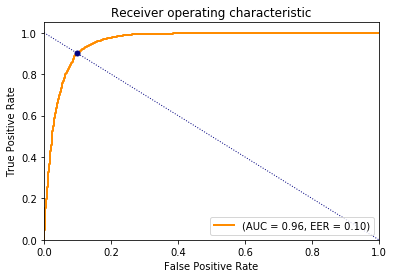

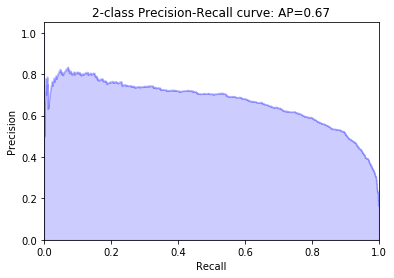

In [6]:
ganomaly.evaluate_best(test_dataset)